In [4]:
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

In [5]:
!python plot_results.py --initial_poses sphere_init.g2o --optimized_poses sphere_init.g2o
plot.show()

Figure(640x480)


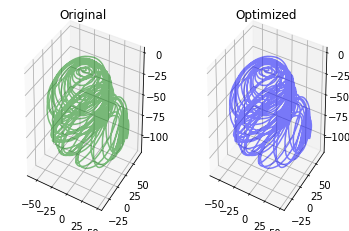

In [9]:
#!/usr/bin/python
#
# Plots the results from the 3D pose graph optimization. It will draw a line
# between consecutive vertices.  The commandline expects two optional filenames:
#
#   ./plot_results.py --initial_poses filename  --optimized_poses filename
#
# The files have the following format:
#   ID x y z q_x q_y q_z q_w

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plot
import numpy
import sys
from optparse import OptionParser

def set_axes_equal(axes):
    ''' Sets the axes of a 3D plot to have equal scale. '''
    x_limits = axes.get_xlim3d()
    y_limits = axes.get_ylim3d()
    z_limits = axes.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = numpy.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = numpy.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = numpy.mean(z_limits)

    length = 0.5 * max([x_range, y_range, z_range])

    axes.set_xlim3d([x_middle - length, x_middle + length])
    axes.set_ylim3d([y_middle - length, y_middle + length])
    axes.set_zlim3d([z_middle - length, z_middle + length])
    pass
    
class foo(object):
    def __init__(self):
        pass
options = foo()
options.initial_poses = 'sphere_init.g2o'
options.optimized_poses = 'sphere_init.g2o'
options.axes_equal = False

# Read the original and optimized poses files.
poses_original = None
if options.initial_poses != '':
  poses_original = numpy.genfromtxt(options.initial_poses,
                                    usecols = (1, 2, 3))

poses_optimized = None
if options.optimized_poses != '':
  poses_optimized = numpy.genfromtxt(options.optimized_poses,
                                     usecols = (1, 2, 3))

# Plots the results for the specified poses.
figure = plot.figure()

if poses_original is not None:
  axes = plot.subplot(1, 2, 1, projection='3d')
  plot.plot(poses_original[:, 0], poses_original[:, 1], poses_original[:, 2],
            '-', alpha=0.5, color="green")
  plot.title('Original')
  if options.axes_equal:
    axes.set_aspect('equal')
    set_axes_equal(axes)


if poses_optimized is not None:
  axes = plot.subplot(1, 2, 2, projection='3d')
  plot.plot(poses_optimized[:, 0], poses_optimized[:, 1], poses_optimized[:, 2],
            '-', alpha=0.5, color="blue")
  plot.title('Optimized')
  if options.axes_equal:
    axes.set_aspect('equal')
    set_axes_equal(plot.gca())


# Show the plot and wait for the user to close.
plot.show()
